## Importing and checking Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv('retail_data.csv',encoding= 'unicode_escape')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df[["InvoiceDate"]] = df[["InvoiceDate"]].apply(pd.to_datetime)

In [7]:
df.drop(df[(df['Quantity'] <= 0)].index, inplace = True)

## Most Purchased Items

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Most Purchased Items:
AxesSubplot(0.125,0.125;0.775x0.755)


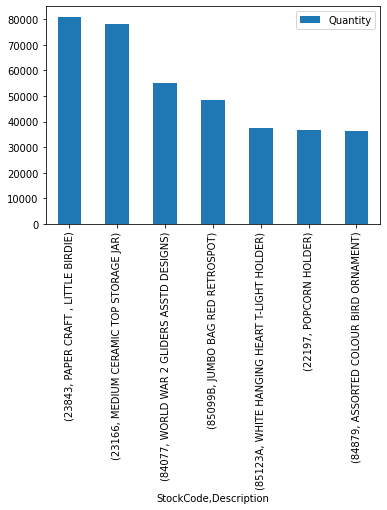

In [10]:
mostselled = df.groupby(['StockCode','Description']).sum()
mostselled= mostselled.sort_values(by='Quantity',ascending=False)
mostselled= mostselled.drop(['CustomerID','UnitPrice'], axis=1)
mostselled7 = mostselled.head(7)
print("Most Purchased Items:")
print(mostselled7.plot.bar())

## Top buying countries

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Top Buying Countries:


<AxesSubplot:xlabel='Country'>

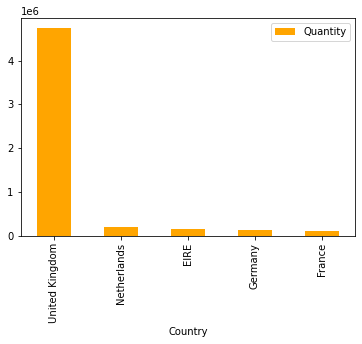

In [12]:
country = df.groupby(['Country']).sum()
country = country.sort_values(by='Quantity',ascending=False)
country = country.drop(['CustomerID','UnitPrice'], axis=1)
country5 = country.head(5)
print("Top Buying Countries:")
country5.plot.bar(color = 'orange')

## Top spending countries

In [13]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [14]:
df2 = df

In [15]:
df2['Quantity*UnitPrice'] = df2['Quantity']*df2['UnitPrice']
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity*UnitPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Top Buying Countries:


<AxesSubplot:xlabel='Country'>

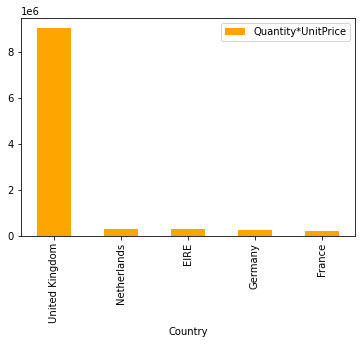

In [16]:
ccountry = df2.groupby(['Country']).sum()
ccountry = ccountry.sort_values(by='Quantity*UnitPrice',ascending=False)
ccountry = ccountry.drop(['Quantity','CustomerID','UnitPrice'], axis=1)
ccountry5 = ccountry.head(5)
print("Top Buying Countries:")
ccountry5.plot.bar(color = 'orange')

## Returns

In [17]:
df3 =  pd.read_csv('retail_data.csv',encoding= 'unicode_escape')
df3.drop(df3[(df3['Quantity'] > 0)].index, inplace = True)
returns = df3.groupby(['Description']).sum()
returns =returns.sort_values(by='Quantity',ascending=True)
returns10 = returns.head(10)
returns10

,Quantity,UnitPrice,CustomerID
Description,,,
"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08,16446.0
MEDIUM CERAMIC TOP STORAGE JAR,-74494,11.66,142297.0
printing smudges/thrown away,-19200,0.00,0.0
"Unsaleable, destroyed.",-15644,0.00,0.0
check,-13247,0.00,0.0
?,-9496,0.00,0.0
ROTATING SILVER ANGELS T-LIGHT HLDR,-9376,7.68,48937.0
Printing smudges/thrown away,-9058,0.00,0.0
Damaged,-7540,0.00,0.0


## The relationship between the number of purchases and the date

array([<AxesSubplot:xlabel='InvoiceDate'>], dtype=object)

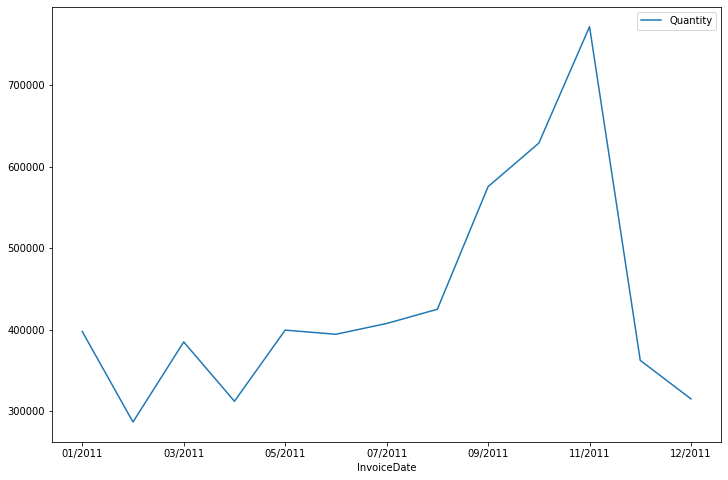

In [8]:
date = df
date['InvoiceDate'] = pd.to_datetime(date['InvoiceDate']).dt.strftime('%m/%Y')
date1 = date.groupby(['InvoiceDate']).sum()
date1 = date1.drop(['UnitPrice','CustomerID'], axis=1)
plt.rcParams["figure.figsize"] = (12,8)
date1.plot.line(subplots=True)

## We are checking for a relationship between unit price and quantity.

In [84]:
cus = df
cus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [86]:
cus2 = cus.groupby(['StockCode', 'UnitPrice']).sum()
cus2 = cus2.drop(['CustomerID'], axis=1)
cus2.head(50)

Quantity
StockCode UnitPrice          
10002     0.00            180
          0.85            824
          1.63              9
          1.66             27
10080     0.00            192
          0.39            301
          0.85              2
10120     0.21            193
10123C    0.65              5
10124A    0.42             16
10124G    0.42             17
10125     0.42            260
          0.79             24
          0.81             36
          0.85            966
          1.63              6
          1.66              4
10133     0.42           2056
          0.79             58
          0.81             38
          0.83            379
          0.85            331
          1.63              4
          1.66              1
10135     0.25             46
          0.42            740
          1.06            300
          1.25            905
          1.28            132
          2.46             84
          2.51             24
11001     0.83            281
          1.27            464
          1.69            810
          3.29             51
          3.36              9
15030     0.00            150
          0.29            143
15034     0.07           2880
          0.14           3539
          0.83            162
          0.85             10
15036     0.53            600
          0.65           4800
          0.72           8688
          0.75           1455
          0.83           7095
          1.25             52
          1.28             58
          1.63           1078

## Model

In [2]:
df = pd.read_csv('retail_data.csv',encoding= 'unicode_escape')

In [3]:
dff = df
dff['InvoiceDate'] = pd.to_datetime(dff['InvoiceDate']).dt.strftime('%m/%Y')
datecolumndummy = pd.get_dummies(dff['InvoiceDate'])
dff = pd.concat((dff,datecolumndummy), axis = 1)
dff = dff.drop(['InvoiceDate'],axis=1)
dff2 = dff

In [4]:
data3 = dff2.groupby(['CustomerID']).sum()
data3

,Quantity,UnitPrice,01/2011,02/2011,03/2011,04/2011,05/2011,06/2011,07/2011,08/2011,09/2011,10/2011,11/2011,12/2010,12/2011
CustomerID,,,,,,,,,,,,,,,
12346.0,0,2.08,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,2458,481.21,29.0,0.0,0.0,24.0,0.0,18.0,0.0,22.0,0.0,47.0,0.0,31.0,11.0
12348.0,2341,178.71,6.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,17.0,0.0
12349.0,631,605.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0
12350.0,197,65.30,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,45,47.65,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,54,39.36,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,98,62.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,5.0


In [5]:
dff['01/2011'] = dff['01/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['02/2011'] = dff['02/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['03/2011'] = dff['03/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['04/2011'] = dff['04/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['05/2011'] = dff['05/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['06/2011'] = dff['06/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['07/2011'] = dff['07/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['08/2011'] = dff['08/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['09/2011'] = dff['09/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['10/2011'] = dff['10/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['11/2011'] = dff['11/2011'] * dff['Quantity'] * dff['UnitPrice']
dff['12/2010'] = dff['12/2010'] * dff['Quantity'] * dff['UnitPrice']
dff['12/2011'] = dff['12/2011'] * dff['Quantity'] * dff['UnitPrice']
data = dff.groupby(['CustomerID']).sum()
data

,Quantity,UnitPrice,01/2011,02/2011,03/2011,04/2011,05/2011,06/2011,07/2011,08/2011,09/2011,10/2011,11/2011,12/2010,12/2011
CustomerID,,,,,,,,,,,,,,,
12346.0,0,2.08,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
12347.0,2458,481.21,475.39,0.0,0.0,636.25,0.00,382.52,0.00,584.91,0.0,1294.32,0.00,711.79,224.82
12348.0,2341,178.71,227.44,0.0,0.0,367.00,0.00,0.00,0.00,0.00,310.0,0.00,0.00,892.80,0.00
12349.0,631,605.10,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1757.55,0.00,0.00
12350.0,197,65.30,0.00,334.4,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,45,47.65,0.00,0.0,180.6,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
18281.0,54,39.36,0.00,0.0,0.0,0.00,0.00,80.82,0.00,0.00,0.0,0.00,0.00,0.00,0.00
18282.0,98,62.68,0.00,0.0,0.0,0.00,0.00,0.00,0.00,98.76,0.0,0.00,0.00,0.00,77.84


In [6]:
data1 = data[['12/2010','01/2011','02/2011','03/2011','04/2011','05/2011','06/2011','07/2011','08/2011','09/2011','10/2011','11/2011','12/2011',]]
data2 = data1
a = data2.columns.values.tolist()
for indices, row in data2.iterrows():
    for column in a:
        if data2.at[indices,column] > 0:
            row[column] = 1
        else:
            row[column] = 0

In [7]:
data2 = data2.astype(int)
data2['Loyal Customer'] = data2['12/2010']+data2['01/2011']+data2['02/2011']+data2['03/2011']+data2['04/2011']+data2['05/2011']+data2['06/2011']+data2['07/2011']+data2['08/2011']+data2['09/2011']+data2['10/2011']+data2['11/2011']
for ind in data2.index:
    if data2['Loyal Customer'][ind] <5:
        data2['Loyal Customer'][ind] = 0
    else:
        data2['Loyal Customer'][ind] = 1
data2

,12/2010,01/2011,02/2011,03/2011,04/2011,05/2011,06/2011,07/2011,08/2011,09/2011,10/2011,11/2011,12/2011,Loyal Customer
CustomerID,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1,1
12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [8]:
x = data2.drop('12/2011', axis = 1)
y = data2['12/2011']

In [9]:
x

,12/2010,01/2011,02/2011,03/2011,04/2011,05/2011,06/2011,07/2011,08/2011,09/2011,10/2011,11/2011,Loyal Customer
CustomerID,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,0,0,0
12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [10]:
y

CustomerID
12346.0    0
12347.0    1
12348.0    0
12349.0    0
12350.0    0
          ..
18280.0    0
18281.0    0
18282.0    1
18283.0    1
18287.0    0
Name: 12/2011, Length: 4372, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size=0.3)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(random_state = 1)
model.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [13]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv) 

0.8635670731707317

In [14]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_cv, pred_cv)
cnf
#TP FP
#FN TN

array([[1112,   16],
       [ 163,   21]], dtype=int64)

In [15]:
from sklearn.model_selection import StratifiedKFold

In [16]:
i=0
mean = 0
kf = StratifiedKFold(n_splits=5)

for train_index,test_index in kf.split(x,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    
    ytr,yvl = y[train_index],y[test_index]
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    
    mean += score #mean=mean+score
    print ('accuracy_score',score)
    
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
    
print ('\n Mean Validation Accuracy',mean/(i-1))


0 of kfold 5 


KeyError: "None of [Int64Index([ 836,  843,  845,  865,  876,  878,  879,  882,  883,  884,\n            ...\n            4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371],\n           dtype='int64', name='CustomerID', length=3497)] are in the [index]"

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=1)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [19]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8346036585365854

In [20]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_cv, pred_cv)
cnf
#TP FP
#FN TN

array([[1050,   78],
       [ 139,   45]], dtype=int64)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [22]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8551829268292683

In [23]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_cv, pred_cv)
cnf
#TP FP
#FN TN

array([[1092,   36],
       [ 154,   30]], dtype=int64)